<a href="https://colab.research.google.com/github/AngelFA04/curso_estadistica_aplicada_py/blob/master/S23_Arboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión y clasificación

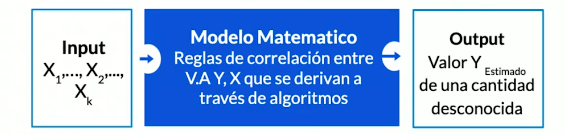

Al igual que las regresiones lineales o logísticas los arboles de decisión son otro tipo de algoritmo de naturaleza **explicativa** y **predictiva** que permite estimar un valor de $Y$ basado en asociaciones con los eventos $X_1, X_2,...,X_k$

Los árboles de decisión son ampliamente utilizados debido a su alta capacidad explicativa a la hora de estimar $Y$ con un ocnjunto de variables $X$.

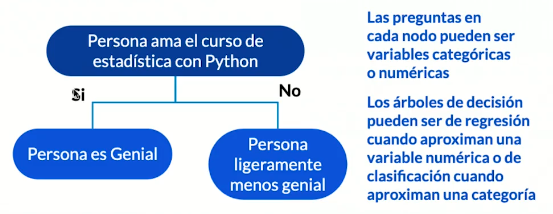

---

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os

In [9]:
!wget https://static.platzi.com/media/tmp/class-files/git/fundamentos-estadistica-analisis-de-datos-python/fundamentos-estadistica-analisis-de-datos-python-22-arboles-decision/rating-peliculas.csv

--2020-09-01 20:26:30--  https://static.platzi.com/media/tmp/class-files/git/fundamentos-estadistica-analisis-de-datos-python/fundamentos-estadistica-analisis-de-datos-python-22-arboles-decision/rating-peliculas.csv
Resolving static.platzi.com (static.platzi.com)... 104.20.19.218, 104.20.18.218, 172.67.19.213, ...
Connecting to static.platzi.com (static.platzi.com)|104.20.19.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21504 (21K) [text/csv]
Saving to: ‘rating-peliculas.csv’

rating-peliculas.cs 100%[===================>]  21.00K  --.-KB/s    in 0s      

2020-09-01 20:26:31 (114 MB/s) - ‘rating-peliculas.csv’ saved [21504/21504]



In [10]:
df = pd.read_csv('rating-peliculas.csv')

In [11]:
df.head()

,pelicula,genero,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [12]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


A continuación se va a establecer la variable objetivo $Y$ para predecir el genero de una pelicula.

In [15]:
y = df['genero']
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [16]:
len(y)

559

In [20]:
X = df.drop(['pelicula', 'genero'], axis=1)

Ahora se va a aplicar una técnica usada en el analisis de datos que consiste en separar la muestra en dos partes. Una será la muestra de entrenamiento y la otra de test, la cual será usada para probar la precisión del modelo.

In [24]:
# A continuniación se generan los sets de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

Se generá el modelo del arbol de decisión usando la función de DecisionTreeClassifier, se usará un clasificador ya que la variable Y es categorica, pero también existen en una versión de regresión para variables númericas. La función recibe los parametros con la siguiente utilidad:
- criterion: Permite entregar al arbol la función de desempeño para encontrar los mejores parametros.

- max_depth: Está asociada a las ramas o los niveles de reglas que se van a generar. 

Las funciones de desempeño de una arbol de decisón suelen ser las siguientes:
 - entropy
 - gini

In [46]:
# Generación del clasificador
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, )
clf = clf.fit(X_train, y_train)
# Calculo de valores predichos de y
y_pred = clf.predict(X_test)

In [42]:
# Un vector con cada uno de los generos predecidos para cada una de las peliculas
y_pred

array(['Comedy', 'Action', 'Action', 'Horror', 'Horror', 'Comedy',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy',
       'Comedy', 'Comedy', 'Drama', 'Comedy', 'Horror', 'Comedy', 'Drama',
       'Drama', 'Action', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy',
       'Drama', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Action', 'Comedy',
       'Comedy', 'Action', 'Drama', 'Drama', 'Comedy', 'Action', 'Comedy',
       'Action', 'Comedy', 'Thriller', 'Action', 'Comedy', 'Comedy',
       'Drama', 'Action', 'Action', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Comedy', 'Horror', 'Comedy', 'Comedy', 'Drama', 'Drama',
       'Drama', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Action',
       'Action', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Action', 'Comedy', 'Drama', 'Comedy', 'Horror', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Comedy', 'Drama', 'Action', 'Comedy', 'Comedy', 'Drama',
       'C

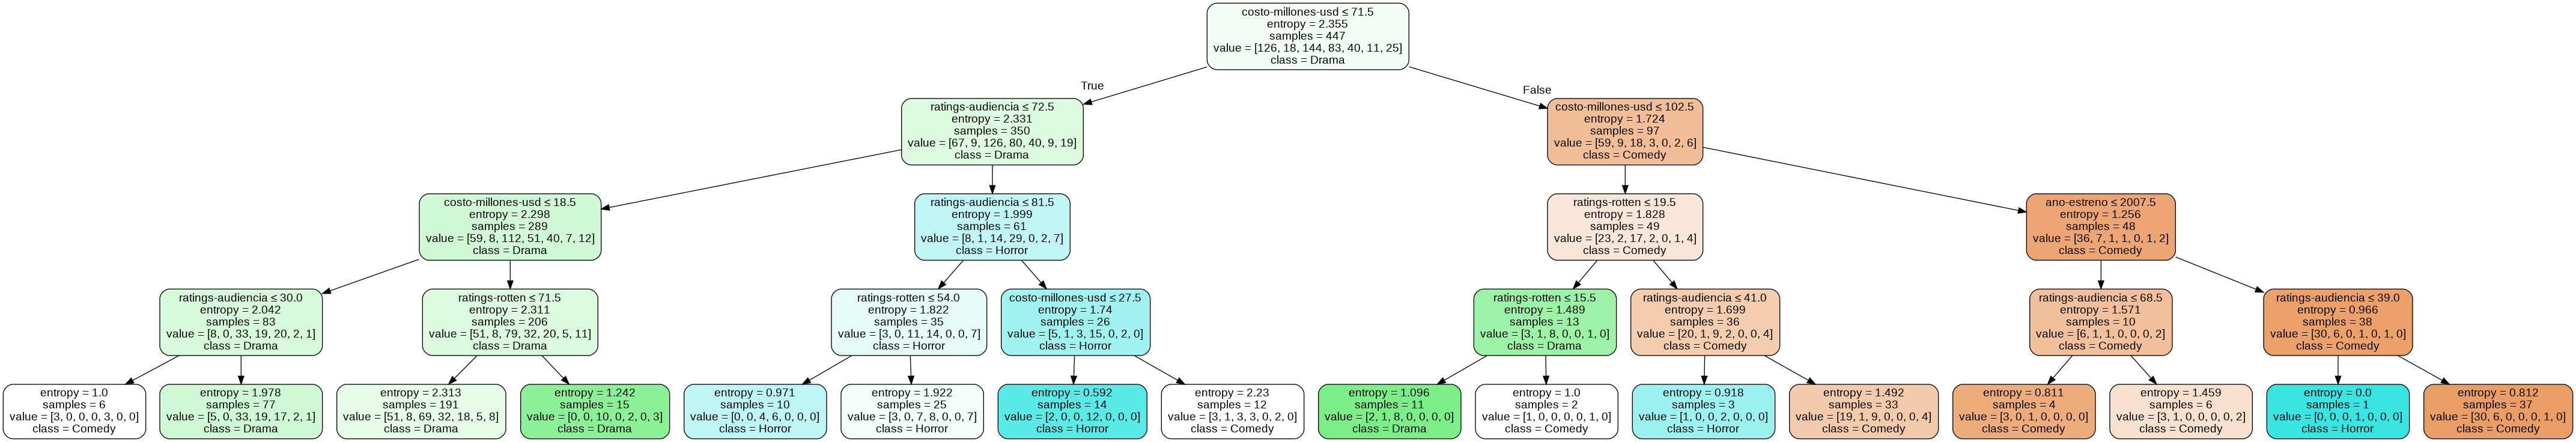

In [47]:
dot_data =  StringIO()
export_graphviz(clf, out_file= dot_data, filled=True, rounded=True,
                special_characters=True,  feature_names = X.columns, class_names= y.value_counts().index)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('peliculas.png')
Image(graph.create_png())

## Nivel de precisión del modelo

In [48]:
metrics.accuracy_score(y_test, y_pred)

0.36607142857142855